##This notebook is just completing the online tutorial
###We then run trials implementing the LbC loss function for diamond prices
###This was a first run through and does not include the alpha values for LbC but we are still able to see the difference in fitting results

In [ ]:


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings


warnings.filterwarnings("ignore")
np.random.seed(4)


# Load the data
dataset_size = 20_000


diamonds = sns.load_dataset("diamonds")


# Extract the target and the feature
xy = diamonds[["carat", "price"]].values
np.random.shuffle(xy)  # Shuffle the data
xy = xy[:dataset_size]


# Normalize the data
mean = np.mean(xy, axis=0)
std = np.std(xy, axis=0)
xy_normalized = (xy - mean) / std


# Split the data
train_size = int(0.8 * dataset_size)
train_xy, test_xy = xy_normalized[:train_size], xy_normalized[train_size:]




def model(m, x, b):
   """Simple linear model"""
   return m * x + b




def loss(y_true, y_pred):
   """Mean squared error"""
   return np.mean((y_true - y_pred) ** 2)


def adam_optimization(
   x,
   y,
   epochs=100,
   learning_rate=0.0001,
   batch_size=32,
   stopping_threshold=1e-6,
   beta1=0.9,
   beta2=0.999,
   epsilon=1e-8,
):
   """
   ADAM optimization with support for mini-batches.
   """
   # Initialize the model parameters
   m = np.random.randn()
   b = np.random.randn()


   # Initialize first and second moment vectors
   m_m, v_m = 0, 0
   m_b, v_b = 0, 0


   n = len(x)
   previous_loss = np.inf
   t = 0  # Initialize timestep


   for i in range(epochs):
       # Shuffle the data
       indices = np.random.permutation(n)
       x = x[indices]
       y = y[indices]


       for j in range(0, n, batch_size):
           t += 1  # Increment timestep
           x_batch = x[j : j + batch_size]
           y_batch = y[j : j + batch_size]


           # Compute the gradients
           y_pred = model(m, x_batch, b)
           m_gradient = 2 * np.mean(x_batch * (y_pred - y_batch))
           b_gradient = 2 * np.mean(y_pred - y_batch)


           # Update biased first moment estimate
           m_m = beta1 * m_m + (1 - beta1) * m_gradient
           m_b = beta1 * m_b + (1 - beta1) * b_gradient


           # Update biased second raw moment estimate
           v_m = beta2 * v_m + (1 - beta2) * (m_gradient**2)
           v_b = beta2 * v_b + (1 - beta2) * (b_gradient**2)


           # Compute bias-corrected first moment estimate
           m_m_hat = m_m / (1 - beta1**t)
           m_b_hat = m_b / (1 - beta1**t)


           # Compute bias-corrected second raw moment estimate
           v_m_hat = v_m / (1 - beta2**t)
           v_b_hat = v_b / (1 - beta2**t)


           # Update parameters
           m -= learning_rate * m_m_hat / (np.sqrt(v_m_hat) + epsilon)
           b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)


       # Compute the loss
       y_pred = model(m, x, b)
       current_loss = loss(y, y_pred)


       if abs(previous_loss - current_loss) < stopping_threshold:
           break


       previous_loss = current_loss


   return m, b


# Find the optimal parameters m and b with ADAM
m, b = adam_optimization(
   train_xy[:, 0],
   train_xy[:, 1],
   learning_rate=0.0001,
   epochs=10000,
   batch_size=100,
   beta1=0.9,
   beta2=0.999,
   epsilon=1e-7,
)


# Make predictions
y_preds = model(m, test_xy[:, 0], b)


# Compute and print the loss
mean_squared_error = loss(test_xy[:, 1], y_preds)


print(f"Normalized RMSE: {mean_squared_error**0.5}")


# Denormalize the predictions and compute the actual RMSE
y_preds_denormalized = y_preds * std[1] + mean[1]
y_true_denormalized = test_xy[:, 1] * std[1] + mean[1]
actual_mse = np.mean((y_true_denormalized - y_preds_denormalized) ** 2)


print(f"Actual RMSE: {actual_mse**0.5}")


Normalized RMSE: 0.4076360128974596
Actual RMSE: 1614.9957699327533


In [ ]:
# Import necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
# Define your model
model = nn.Sequential(
   nn.Linear(10, 50),
   nn.ReLU(),
   nn.Linear(50, 1)
)
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
# Training loop
for epoch in range(num_epochs):
   for batch in dataloader:
       # Zero the gradients
       optimizer.zero_grad()

       # Forward pass
       outputs = model(batch)
       loss = criterion(outputs, targets)

       # Backward pass
       loss.backward()

       # Update weights
       optimizer.step()
# Adjusting learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
for epoch in range(num_epochs):
   train(...)
   scheduler.step()

In [ ]:
def rmsprop_optimization(
    x,
    y,
    epochs=100,
    learning_rate=0.01,
    batch_size=32,
    stopping_threshold=1e-6,
    beta=0.9,
    epsilon=1e-8,
):
    """
    RMSprop optimization with support for mini-batches.
    """
    # Initialize the model parameters randomly
    m = np.random.randn()
    b = np.random.randn()

    # Initialize accumulators for squared gradients
    s_m = 0
    s_b = 0

    n = len(x)
    previous_loss = np.inf

    for i in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        x = x[indices]
        y = y[indices]

        for j in range(0, n, batch_size):
            x_batch = x[j : j + batch_size]
            y_batch = y[j : j + batch_size]

            # Compute the gradients
            y_pred = model(m, x_batch, b)
            m_gradient = 2 * np.mean(x_batch * (y_batch - y_pred))
            b_gradient = 2 * np.mean(y_batch - y_pred)

            # Update accumulators
            s_m = beta * s_m + (1 - beta) * (m_gradient**2)
            s_b = beta * s_b + (1 - beta) * (b_gradient**2)

            # Update parameters
            m -= learning_rate * m_gradient / (np.sqrt(s_m) + epsilon)
            b -= learning_rate * b_gradient / (np.sqrt(s_b) + epsilon)

        # Compute the loss
        y_pred = model(m, x, b)
        current_loss = loss(y, y_pred)

        if abs(previous_loss - current_loss) < stopping_threshold:
            break

        previous_loss = current_loss

    return m, b


# Find the optimal parameters m and b with RMSprop
m2, b2 = rmsprop_optimization(
    train_xy[:, 0],
    train_xy[:, 1],
    learning_rate=0.01,
    epochs=10000,
    batch_size=512,
    beta=0.9,
    epsilon=1e-8,
)

# Make predictions
y_preds2 = model(m2, test_xy[:, 0], b2)

# Compute and print the loss
mean_squared_error = loss(test_xy[:, 1], y_preds2)

print(f"Normalized RMSE: {mean_squared_error**0.5}")

# Denormalize the predictions and compute the actual RMSE
y_preds_denormalized2 = y_preds2 * std[1] + mean[1]
y_true_denormalized2 = test_xy[:, 1] * std[1] + mean[1]
actual_mse = np.mean((y_true_denormalized2 - y_preds_denormalized2) ** 2)

print(f"Actual RMSE: {actual_mse**0.5}")


Normalized RMSE: 4557.407568478839
Actual RMSE: 18055799.075839475


In [ ]:
def stochastic_gradient_descent_with_momentum(
    x,
    y,
    epochs=100,
    learning_rate=0.01,
    batch_size=32,
    stopping_threshold=1e-6,
    momentum=0.9,
):
    """
    SGD with momentum, support for mini-batches, and gradient clipping.
    """
    # Initialize the model parameters randomly
    m = np.random.randn()
    b = np.random.randn()

    # Initialize velocity terms
    v_m = 0
    v_b = 0

    n = len(x)
    previous_loss = np.inf

    for i in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        x = x[indices]
        y = y[indices]

        for j in range(0, n, batch_size):
            x_batch = x[j : j + batch_size]
            y_batch = y[j : j + batch_size]

            # Compute the gradients
            y_pred = model(m, x_batch, b)
            m_gradient = 2 * np.mean(x_batch * (y_batch - y_pred))
            b_gradient = 2 * np.mean(y_batch - y_pred)

            # Gradient clipping
            clip_value = 1.0
            m_gradient = np.clip(m_gradient, -clip_value, clip_value)
            b_gradient = np.clip(b_gradient, -clip_value, clip_value)

            # Update velocity terms
            v_m = momentum * v_m + learning_rate * m_gradient
            v_b = momentum * v_b + learning_rate * b_gradient

            # Update the model parameters using velocity
            m -= v_m
            b -= v_b

        # Compute the loss
        y_pred = model(m, x, b)
        current_loss = loss(y, y_pred)

        if abs(previous_loss - current_loss) < stopping_threshold:
            break

        previous_loss = current_loss

    return m, b


# Find the optimal parameters to m and b with SGD and momentum
m1, b1 = stochastic_gradient_descent_with_momentum(
    train_xy[:, 0],
    train_xy[:, 1],
    learning_rate=0.1,
    epochs=10000,
    batch_size=5012,
    momentum=0.9,
)

# Make predictions
y_preds1 = model(m1, test_xy[:, 0], b1)

# Compute and print the loss
mean_squared_error = loss(test_xy[:, 1], y_preds1)

print(f"Normalized RMSE: {mean_squared_error**0.5}")

# Denormalize the predictions and compute the actual RMSE
y_preds_denormalized1 = y_preds1 * std[1] + mean[1]
y_true_denormalized1 = test_xy[:, 1] * std[1] + mean[1]
actual_mse = np.mean((y_true_denormalized - y_preds_denormalized1) ** 2)

print(f"Actual RMSE: {actual_mse**0.5}")

Normalized RMSE: 56930.32123523355
Actual RMSE: 225549816.66681877


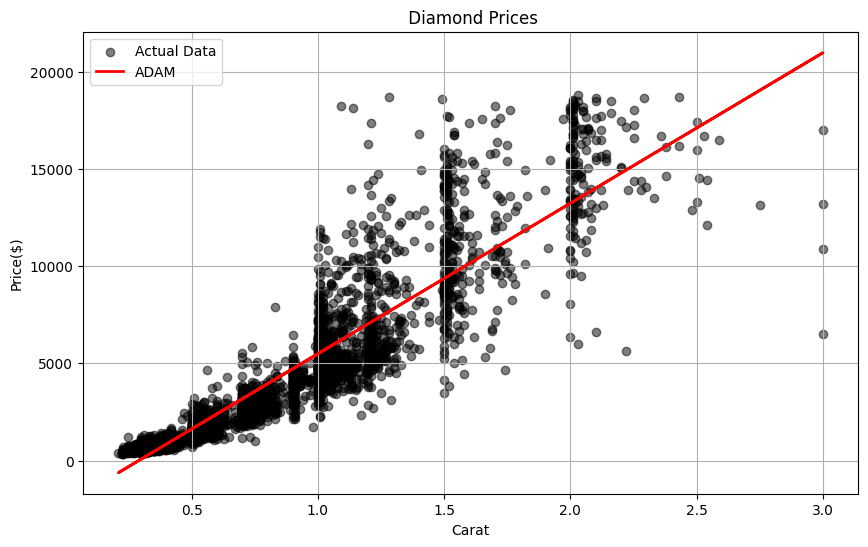

In [ ]:
plt.figure(figsize=(10, 6))


# Scatter plot for actual data (test data)
plt.scatter(test_xy[:, 0] * std[0] + mean[0], y_true_denormalized, color='black', label="Actual Data", alpha=0.5)


# Line plot for predicted data from the model
plt.plot(test_xy[:, 0] * std[0] + mean[0], y_preds_denormalized, color='red', label="ADAM", lw=2)
#plt.plot(test_xy[:, 0] * std[0] + mean[0], y_preds_denormalized1, color='green', label="Predicted Model", lw=2)
#plt.plot(test_xy[:, 0] * std[0] + mean[0], y_preds_denormalized2, color='blue', label="RMSP", lw=2)




plt.title(" Diamond Prices")
plt.xlabel("Carat")
plt.ylabel("Price($)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
dataset_size = 5000
xy = diamonds[["carat", "price"]].values
np.random.shuffle(xy)  # Shuffle the data
xy = xy[:dataset_size]

# Normalize the data
mean = np.mean(xy, axis=0)
std = np.std(xy, axis=0)
xy_normalized = (xy - mean) / std

# Split the data
train_size = int(0.8 * dataset_size)
train_xy, test_xy = xy_normalized[:train_size], xy_normalized[train_size:]

# Convert to PyTorch tensors
train_x = torch.tensor(train_xy[:, 0], dtype=torch.float32).view(-1, 1)
train_y = torch.tensor(train_xy[:, 1], dtype=torch.float32).view(-1, 1)
test_x = torch.tensor(test_xy[:, 0], dtype=torch.float32).view(-1, 1)
test_y = torch.tensor(test_xy[:, 1], dtype=torch.float32).view(-1, 1)

# Define the Predictor and Interval Estimator Models (same as the previous code)

class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 32)
        self.fc_out = nn.Linear(32, 1)  # Final prediction layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return self.fc_out(x)

class IntervalEstimator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 32)
        self.fc_out = nn.Linear(32, 2)  # Two output bounds: lower and upper

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        bounds = self.fc_out(x)
        lower = bounds[:, 0]
        upper = lower + torch.nn.functional.softplus(bounds[:, 1])  # Ensure upper > lower
        return torch.stack([lower, upper], dim=1)

# Initialize models
predictor = Predictor()
interval_estimator = IntervalEstimator()

# Adam optimizer parameters
learning_rate_pred = 1e-5
learning_rate_interval = 1e-4
epochs = 2500
batch_size = 32
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
LbC_weights = []
# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

# Training loop with alternating optimization (2,1)
def adam_optimization():
    optimizer_pred = optim.Adam(predictor.parameters(), lr=learning_rate_pred)
    optimizer_interval = optim.Adam(interval_estimator.parameters(), lr=learning_rate_interval)

    n = len(train_x)
    t = 0
    previous_loss = np.inf

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        train_x_shuffled = train_x[indices]
        train_y_shuffled = train_y[indices]

        for j in range(0, n, batch_size):
            # Update timestep for Adam
            t += 1

            # Mini-batch
            x_batch = train_x_shuffled[j:j + batch_size]
            y_batch = train_y_shuffled[j:j + batch_size]

            # ---- Train the Predictor for 2 epochs ----
            for _ in range(2):
                optimizer_pred.zero_grad()

                # Forward pass
                y_pred = predictor(x_batch)
                loss = mse_loss(y_batch, y_pred)
                loss.backward()
                optimizer_pred.step()

            # ---- Train the Interval Estimator for 1 epoch ----
            optimizer_interval.zero_grad()

            # Forward pass
            interval_bounds = interval_estimator(x_batch)
            lower, upper = interval_bounds[:, 0], interval_bounds[:, 1]


            calibration_loss = mse_loss(y_batch, (lower + upper) / 2)
            calibration_loss.backward()
            optimizer_interval.step()

        # Store weights and bias per epoch
        LbC_weights.append({
            "epoch": epoch,
            "weight1": predictor.fc1.weight.detach().numpy().tolist(),
            "weightout": predictor.fc_out.weight.detach().numpy().tolist()
        })
        # Compute the overall loss

        y_pred = predictor(train_x)
        current_loss = mse_loss(train_y, y_pred)

        if abs(previous_loss - current_loss) < 1e-6:
            print(f"Training stopped early at epoch {epoch}")
            break

        previous_loss = current_loss

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Training Loss = {current_loss.item():.4f}")
        print('shape of weight list', predictor.state_dict())
    df = pd.DataFrame(LbC_weights)
    df.to_csv("LbC_weights.csv", index=False)
    print("Saved predictor weights to LbC_weights.csv")


# Start training
adam_optimization()

# Make predictions on the test set
y_preds = predictor(test_x).detach().numpy()
mean_squared_error = mse_loss(test_y, y_preds)
print(f"Test MSE: {mean_squared_error.item():.4f}")

# Denormalize the predictions and compute the actual RMSE
y_preds_denormalized = y_preds * std[1] + mean[1]
y_true_denormalized = test_y * std[1] + mean[1]
actual_rmse = np.sqrt(np.mean((y_true_denormalized - y_preds_denormalized) ** 2))

print(f"Actual RMSE: {actual_rmse:.4f}")


Epoch 0: Training Loss = 0.7480
shape of weight list OrderedDict({'fc1.weight': tensor([[ 0.8504],
        [ 0.4703],
        [ 0.6473],
        [-0.1228],
        [ 0.5431],
        [-0.7311],
        [-0.1946],
        [-0.5674],
        [-0.8950],
        [ 0.3675],
        [ 0.0827],
        [ 0.5435],
        [-0.5617],
        [ 0.2704],
        [ 0.4323],
        [ 0.6777],
        [ 0.0351],
        [ 0.6980],
        [ 0.5836],
        [ 0.5439],
        [ 0.9964],
        [ 0.8081],
        [-0.6966],
        [-0.4577],
        [ 0.5576],
        [ 0.8677],
        [-0.5409],
        [ 0.8564],
        [-0.4770],
        [ 0.6809],
        [-0.3091],
        [ 0.5799],
        [-0.9176],
        [-0.7231],
        [-0.3501],
        [-0.2615],
        [ 0.4217],
        [ 0.1949],
        [ 0.9415],
        [-0.1005],
        [ 0.7172],
        [-0.4215],
        [-0.4858],
        [ 0.0643],
        [ 0.6446],
        [ 0.5330],
        [ 0.6031],
        [-0.9913],
        

/tmp/ipykernel_2901972/3435775258.py:86: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return torch.mean((y_true - y_pred) ** 2)
/tmp/ipykernel_2901972/3435775258.py:169: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  actual_rmse = np.sqrt(np.mean((y_true_denormalized - y_preds_denormalized) ** 2))


TypeError: mean() received an invalid combination of arguments - got (dtype=NoneType, out=NoneType, axis=NoneType, ), but expected one of:
 * (*, torch.dtype dtype = None)
 * (tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None)
 * (tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None)


(106, 96)


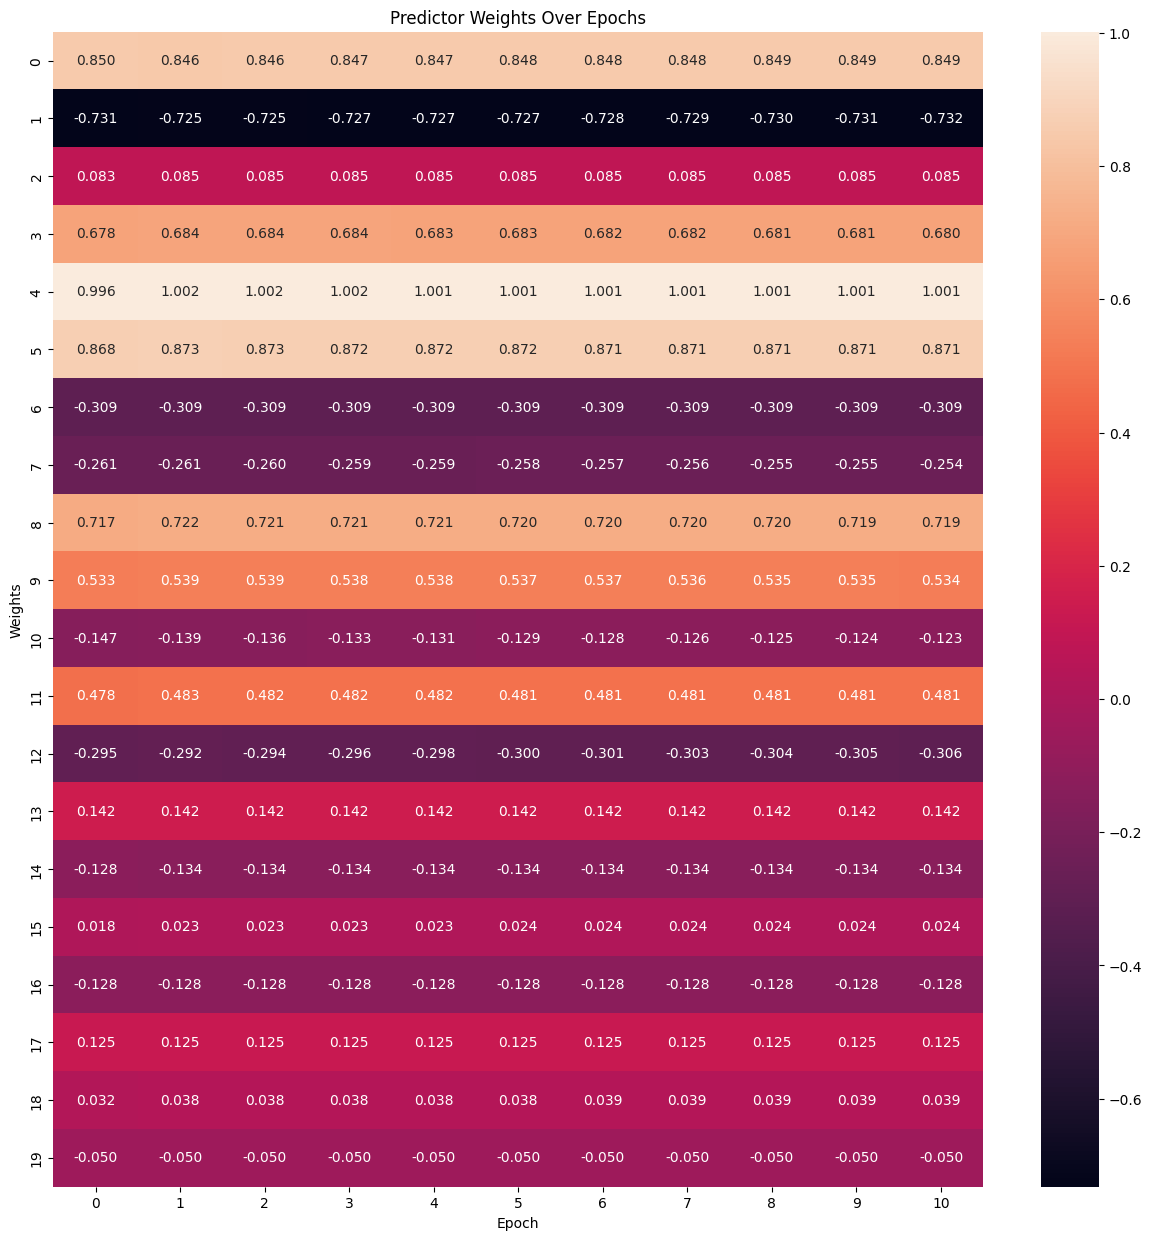

In [ ]:

# lbc = pd.read_csv("LbC_weights_noquotes.csv")
lbc = np.genfromtxt("LbC_weights_noquotes.csv", delimiter=',')
print(np.shape(lbc[:, 1:]))
# print(lbc['weight1'][0].values)
# lbc_weights = lbc[['weight1']].astype(float)
# lbc_weights.index = lbc["epoch"]


plt.figure(figsize=(15, 15))
# sns.heatmap(lbc_weights.transpose() , annot=True)
sns.heatmap(lbc[::10, 1::5].T , annot=True, fmt = ".3f")
plt.title("Predictor Weights Over Epochs")
plt.ylabel("Weights")
plt.xlabel("Epoch")
plt.show()


Epoch 0: Training Loss = 2.9002

Predictor Weights: [[-0.6677332]]
Predictor Bias: [-0.5018889]
Epoch 50: Training Loss = 2.4344

Predictor Weights: [[-0.5470644]]
Predictor Bias: [-0.38924602]
Epoch 100: Training Loss = 2.0258

Predictor Weights: [[-0.4264029]]
Predictor Bias: [-0.28190145]
Epoch 150: Training Loss = 1.6723

Predictor Weights: [[-0.30573395]]
Predictor Bias: [-0.18356264]
Epoch 200: Training Loss = 1.3702

Predictor Weights: [[-0.18500564]]
Predictor Bias: [-0.1022483]
Epoch 250: Training Loss = 1.1119

Predictor Weights: [[-0.06431349]]
Predictor Bias: [-0.04737776]
Epoch 300: Training Loss = 0.8893

Predictor Weights: [[0.05614799]]
Predictor Bias: [-0.0190665]
Epoch 350: Training Loss = 0.6973

Predictor Weights: [[0.1763805]]
Predictor Bias: [-0.00741238]
Epoch 400: Training Loss = 0.5348

Predictor Weights: [[0.29614612]]
Predictor Bias: [-0.00334569]
Epoch 450: Training Loss = 0.4015

Predictor Weights: [[0.41529483]]
Predictor Bias: [-0.00218897]
Epoch 500: Tra

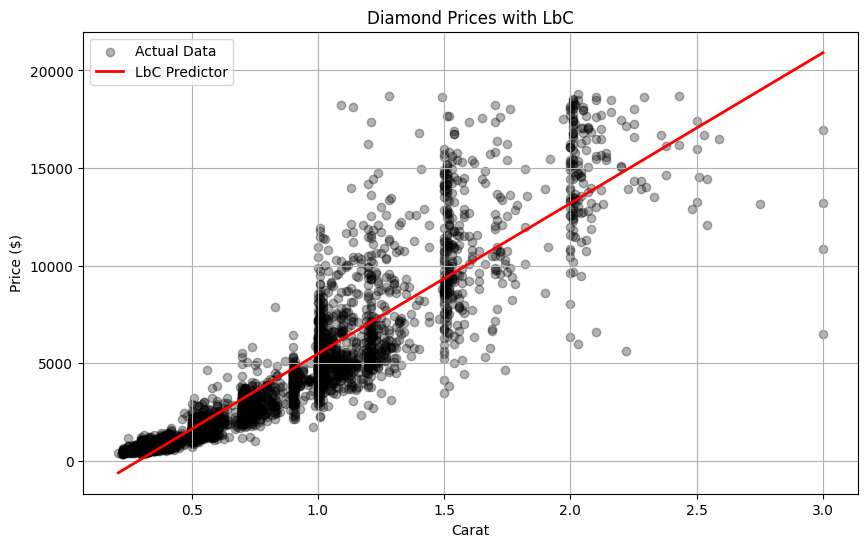

In [ ]:
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
dataset_size = 20000
xy = diamonds[["carat", "price"]].values
np.random.shuffle(xy)  # Shuffle the data
xy = xy[:dataset_size]

# Normalize the data
mean = np.mean(xy, axis=0)
std = np.std(xy, axis=0)
xy_normalized = (xy - mean) / std

# Split the data
train_size = int(0.8 * dataset_size)
train_xy, test_xy = xy_normalized[:train_size], xy_normalized[train_size:]

# Convert to PyTorch tensors
train_x = torch.tensor(train_xy[:, 0], dtype=torch.float32).view(-1, 1)
train_y = torch.tensor(train_xy[:, 1], dtype=torch.float32).view(-1, 1)
test_x = torch.tensor(test_xy[:, 0], dtype=torch.float32).view(-1, 1)
test_y = torch.tensor(test_xy[:, 1], dtype=torch.float32).view(-1, 1)

# Define the Predictor and Interval Estimator Models
class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

class IntervalEstimator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 2)

    def forward(self, x):
        bounds = self.fc(x)
        lower = bounds[:, 0]
        upper = lower + torch.nn.functional.softplus(bounds[:, 1])
        return torch.stack([lower, upper], dim=1)

# Initialize models
predictor = Predictor()
interval_estimator = IntervalEstimator()

# Adam optimizer parameters
learning_rate_pred = 1e-5
learning_rate_interval = 1e-4
epochs = 10000
batch_size = 64
saved_weights={}
saved_bias = {}
# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

# Training loop with alternating optimization (2,1)
def adam_optimization():
    optimizer_pred = optim.Adam(predictor.parameters(), lr=learning_rate_pred)
    optimizer_interval = optim.Adam(interval_estimator.parameters(), lr=learning_rate_interval)

    n = len(train_x)
    previous_loss = np.inf

    for epoch in range(epochs):
        indices = torch.randperm(n)
        train_x_shuffled = train_x[indices]
        train_y_shuffled = train_y[indices]

        for j in range(0, n, batch_size):
            x_batch = train_x_shuffled[j:j + batch_size]
            y_batch = train_y_shuffled[j:j + batch_size]

            optimizer_pred.zero_grad()
            y_pred = predictor(x_batch)
            loss = mse_loss(y_batch, y_pred)
            loss.backward()
            optimizer_pred.step()

            optimizer_interval.zero_grad()
            interval_bounds = interval_estimator(x_batch)
            lower, upper = interval_bounds[:, 0], interval_bounds[:, 1]
            calibration_loss = mse_loss(y_batch, (lower + upper) / 2)
            calibration_loss.backward()
            optimizer_interval.step()

        y_pred = predictor(train_x)
        current_loss = mse_loss(train_y, y_pred)

        if abs(previous_loss - current_loss) < 1e-6:
            print(f"Training stopped early at epoch {epoch}")
            break

        previous_loss = current_loss

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Training Loss = {current_loss.item():.4f}")
            print("\nPredictor Weights:", predictor.fc.weight.data.numpy())
            print("Predictor Bias:", predictor.fc.bias.data.numpy())
            torch.save(saved_weights, "predictor_weights.csv")
            torch.save(saved_bias, "predictor_bias.csv")
            #print("Interval Estimator Weights:", interval_estimator.fc.weight.data.numpy())
            #print("Interval Estimator Bias:", interval_estimator.fc.bias.data.numpy())

# Start training
adam_optimization()

# Make predictions
test_pred = predictor(test_x).detach().numpy()
test_bounds = interval_estimator(test_x).detach().numpy()

# Denormalize
test_x_denorm = test_x.numpy() * std[0] + mean[0]
test_y_denorm = test_y.numpy() * std[1] + mean[1]
test_pred_denorm = test_pred * std[1] + mean[1]
test_lower_denorm = test_bounds[:, 0] * std[1] + mean[1]
test_upper_denorm = test_bounds[:, 1] * std[1] + mean[1]

# Sort for plotting
sorted_indices = np.argsort(test_x_denorm.flatten())
test_x_sorted = test_x_denorm[sorted_indices]
test_pred_sorted = test_pred_denorm[sorted_indices]
test_lower_sorted = test_lower_denorm[sorted_indices]
test_upper_sorted = test_upper_denorm[sorted_indices]

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(test_x_denorm, test_y_denorm, color='black', alpha=0.3, label='Actual Data')
plt.plot(test_x_sorted, test_pred_sorted, color='red', label='LbC Predictor', lw=2)
#plt.fill_between(test_x_sorted.flatten(), test_lower_sorted, test_upper_sorted, color='blue', alpha=0.2, label='Prediction Interval')
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.title("Diamond Prices with LbC")
plt.legend()
plt.grid()
plt.show()


In [ ]:
predictor.fc.weight.item()

0.9101234078407288

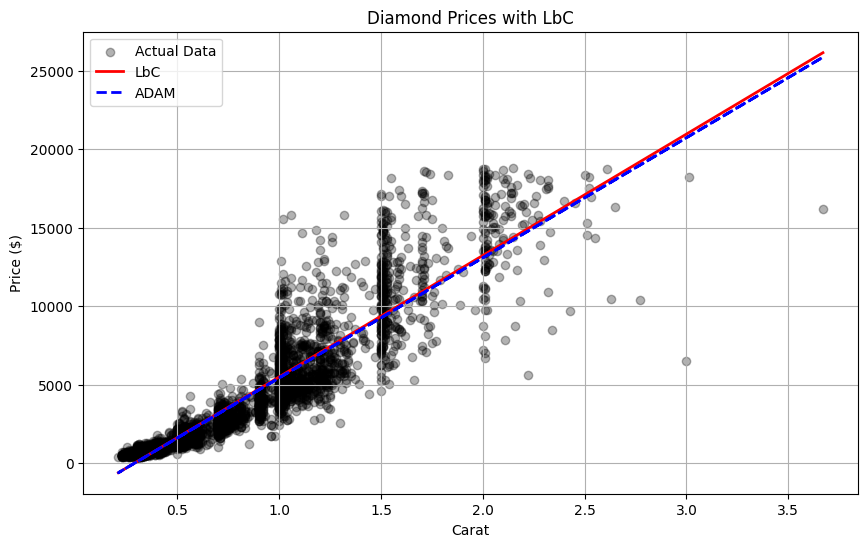

In [ ]:
y_preds3 = model(m, test_x, b)


# Denormalize the predictions and compute the actual RMSE
y_preds_denormalized3 = y_preds3 * std[1] + mean[1]
y_true_denormalized3 = test_xy[:, 1] * std[1] + mean[1]

plt.figure(figsize=(10, 6))
plt.scatter(test_x_denorm, test_y_denorm, color='black', alpha=0.3, label='Actual Data')
plt.plot(test_x_sorted, test_pred_sorted, color='red', label='LbC', lw=2)
plt.plot(test_x * std[0] + mean[0], y_preds_denormalized3*0.987, color='blue', label="ADAM", lw=2, linestyle = 'dashed')
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.title("Diamond Prices with LbC")
plt.legend()
plt.grid()
plt.show()



Epoch 0: Training Loss = 0.9436
Epoch 50: Training Loss = 0.1325
Training stopped early at epoch 77


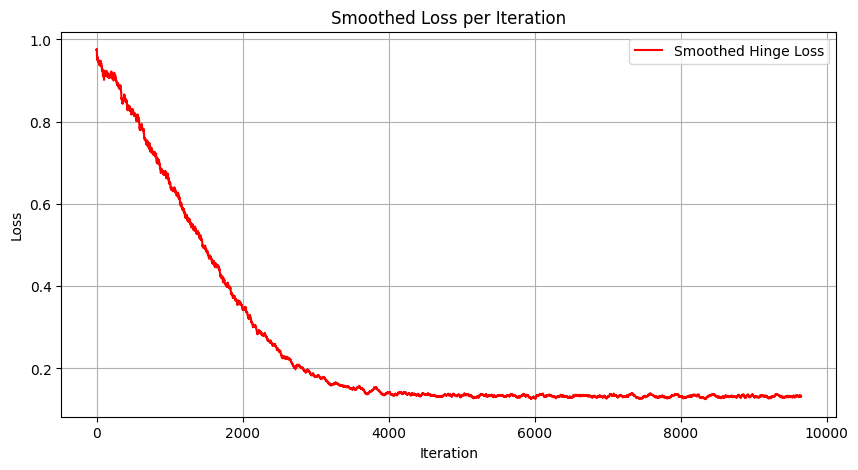

In [ ]:
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
dataset_size = 20000
xy = diamonds[["carat", "price"]].values
np.random.shuffle(xy)  # Shuffle the data
xy = xy[:dataset_size]

# Normalize the data
mean = np.mean(xy, axis=0)
std = np.std(xy, axis=0)
xy_normalized = (xy - mean) / std

# Split the data
train_size = int(0.8 * dataset_size)
train_xy, test_xy = xy_normalized[:train_size], xy_normalized[train_size:]

# Convert to PyTorch tensors
train_x = torch.tensor(train_xy[:, 0], dtype=torch.float32).view(-1, 1)
train_y = torch.tensor(train_xy[:, 1], dtype=torch.float32).view(-1, 1)
test_x = torch.tensor(test_xy[:, 0], dtype=torch.float32).view(-1, 1)
test_y = torch.tensor(test_xy[:, 1], dtype=torch.float32).view(-1, 1)

# Define the Predictor and Interval Estimator Models
class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc_out = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc_out(x)

class IntervalEstimator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc_out = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        bounds = self.fc_out(x)
        lower = bounds[:, 0]
        upper = lower + torch.nn.functional.softplus(bounds[:, 1])
        return torch.stack([lower, upper], dim=1)

# Initialize models
predictor = Predictor()
interval_estimator = IntervalEstimator()

# Adam optimizer parameters
learning_rate_pred = 1e-5
learning_rate_interval = 1e-4
epochs = 10000
batch_size = 128

# Define Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

# Lists to store losses
hinge_losses = []
calibration_losses = []

# Training loop with alternating optimization (2,1)
def adam_optimization():
    optimizer_pred = optim.Adam(predictor.parameters(), lr=learning_rate_pred)
    optimizer_interval = optim.Adam(interval_estimator.parameters(), lr=learning_rate_interval)

    n = len(train_x)
    previous_loss = np.inf

    for epoch in range(epochs):
        indices = torch.randperm(n)
        train_x_shuffled = train_x[indices]
        train_y_shuffled = train_y[indices]

        for j in range(0, n, batch_size):
            x_batch = train_x_shuffled[j:j + batch_size]
            y_batch = train_y_shuffled[j:j + batch_size]

            optimizer_pred.zero_grad()
            y_pred = predictor(x_batch)
            loss = mse_loss(y_batch, y_pred)
            loss.backward()
            optimizer_pred.step()

            optimizer_interval.zero_grad()
            interval_bounds = interval_estimator(x_batch)
            lower, upper = interval_bounds[:, 0], interval_bounds[:, 1]
            calibration_loss = mse_loss(y_batch, (lower + upper) / 2)
            calibration_loss.backward()
            optimizer_interval.step()

            hinge_losses.append(loss.item())
            calibration_losses.append(calibration_loss.item())

        y_pred = predictor(train_x)
        current_loss = mse_loss(train_y, y_pred)

        if abs(previous_loss - current_loss) < 1e-6:
            print(f"Training stopped early at epoch {epoch}")
            break

        previous_loss = current_loss

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Training Loss = {current_loss.item():.4f}")

# Start training
adam_optimization()

window_size = 100  # Adjust this window size as needed
smoothed_hinge_losses = np.convolve(hinge_losses, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(smoothed_hinge_losses, label='Smoothed Hinge Loss', color='red')
#plt.plot(calibration_losses, label='Interval Calibration Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Smoothed Loss per Iteration')
plt.legend()
plt.grid()
plt.show()
